In [2]:
#imporint warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data understanding

In [4]:
#Reading the dataset
airbnb_data= pd.read_csv('AB_NYC_2019.csv')
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [5]:
airbnb_data.info() #checking details of the datset's columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
airbnb_data.shape #checking the shape

(48895, 16)

## Data cleaning

In [7]:
#checking for duplicated rows
airbnb_data.duplicated().sum()      #no duplicates found

0

**Checking for null values in the dataset**

In [8]:
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
airbnb_data_nullvalues= pd.DataFrame(airbnb_data.isnull().sum())
airbnb_data_nullvalues['Missing values']=airbnb_data_nullvalues[0]
airbnb_data_nullvalues['Null percentage']= airbnb_data_nullvalues['Missing values'].apply(lambda x: x/airbnb_data.shape[0]*100)   #finding null percentage for each column
airbnb_data_nullvalues=airbnb_data_nullvalues[['Missing values', 'Null percentage']]
airbnb_data_nullvalues

,Missing values,Null percentage
id,0,0.000000
name,16,0.032723
host_id,0,0.000000
host_name,21,0.042949
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000


So we can see that columns name and host_name have 0.03% and 0.04% amount of null values which is very miniscule. So we have no issue in dropping these rows from the dataset

In [10]:
#dropping null rows from name and host_name columns
airbnb_data= airbnb_data[-airbnb_data.name.isnull()]
airbnb_data= airbnb_data[-airbnb_data.host_name.isnull()]


In [11]:
#checking missing values and null percentage again
airbnb_data_nullvalues= pd.DataFrame(airbnb_data.isnull().sum())
airbnb_data_nullvalues['Missing values']=airbnb_data_nullvalues[0]
airbnb_data_nullvalues['Null percentage']= airbnb_data_nullvalues['Missing values'].apply(lambda x: x/airbnb_data.shape[0]*100)   #finding null percentage for each column
airbnb_data_nullvalues=airbnb_data_nullvalues[['Missing values', 'Null percentage']]
airbnb_data_nullvalues

,Missing values,Null percentage
id,0,0.000000
name,0,0.000000
host_id,0,0.000000
host_name,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000


In [12]:
#we can see that last_review and reviews_per_month has 20.54% null values. 
#We know that last_review is supposed to be a date column and if we replace the missing values with the mode or a 'missing' category
#it won't help us with the further analysis as it won't be treated as a date column. So we are dropping these rows

airbnb_data= airbnb_data[-airbnb_data.last_review.isnull()]

In [13]:
#checking missing values and null percentage again
airbnb_data_nullvalues= pd.DataFrame(airbnb_data.isnull().sum())
airbnb_data_nullvalues['Missing values']=airbnb_data_nullvalues[0]
airbnb_data_nullvalues['Null percentage']= airbnb_data_nullvalues['Missing values'].apply(lambda x: x/airbnb_data.shape[0]*100)   #finding null percentage for each column
airbnb_data_nullvalues=airbnb_data_nullvalues[['Missing values', 'Null percentage']]
airbnb_data_nullvalues

,Missing values,Null percentage
id,0,0.0
name,0,0.0
host_id,0,0.0
host_name,0,0.0
neighbourhood_group,0,0.0
neighbourhood,0,0.0
latitude,0,0.0
longitude,0,0.0
room_type,0,0.0
price,0,0.0


**So now as we can see all the null values are taken care of and there are no more missing values in the dataset.**

**Checking for outliers**

In [41]:
#putting  the numeric variables in a list
num_variables= list(airbnb_data.describe())
num_variables

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [44]:
#dropping id, host_id as they are not needed
num_variables.remove('id')
num_variables.remove('host_id')
num_variables

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [50]:
#creating a function that will take the numeric columns from the dataset and generate boxplots so that we can check for outliers
def boxplotter(dataset, columns):
    cols= columns
    data= dataset
    sns.boxplot(x= columns, data=data)
    plt.xticks(rotation=90)
    plt.show()

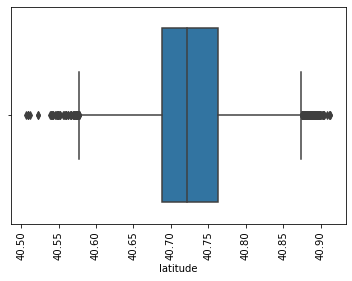

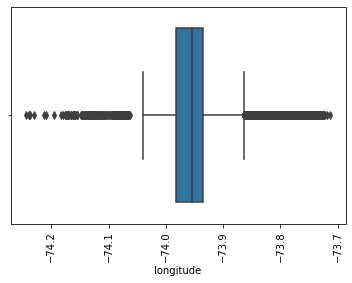

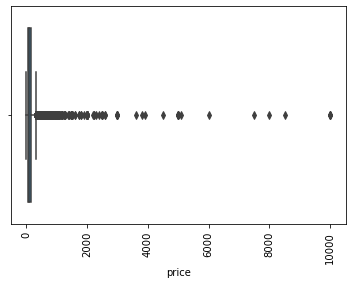

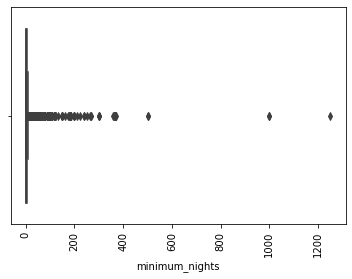

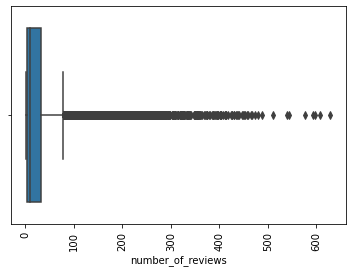

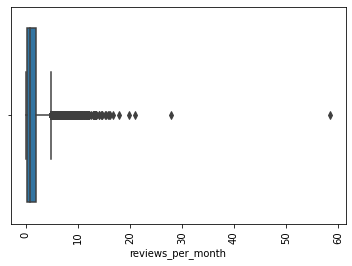

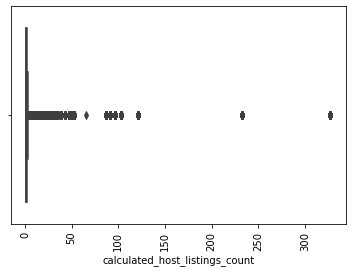

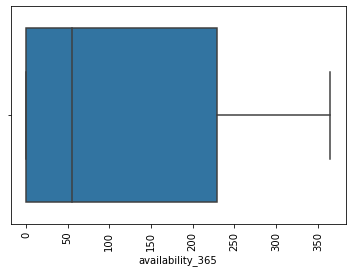

In [51]:
for i in num_variables:
    boxplotter(airbnb_data, i)

We are ignoring latitude and longitude from our outlier analysis as these are location variables

**Checking the outliers in price column**

In [65]:
airbnb_data.price.describe()

count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

In [64]:
#checking quantiles
airbnb_data.price.quantile([0,0.25,0.5,0.75,0.9,0.99])

0.00      0.0
0.25     69.0
0.50    101.0
0.75    170.0
0.90    250.0
0.99    671.6
Name: price, dtype: float64

As we can see the max price is 10000 while the 99% percentile is just 671. This is a massive jump and there is significant gap between the mean and median price as well. So we are capping the max value of price to 700 and considering prices higher than 700 to be outliers.

In [95]:
#capping the price at 700
airbnb_data2= airbnb_data[airbnb_data.price<=700] #creating a new dataframe airbnb_data2 for further cleaning to maintain control of data
airbnb_data2.shape

(38506, 16)

**Checking the outliers in minimum nights column**

In [96]:
airbnb_data2.minimum_nights.describe()

count    38506.000000
mean         5.851374
std         17.326189
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [97]:
#checking quantiles
airbnb_data2.minimum_nights.quantile([0,0.25,0.5,0.75,0.9,0.99])

0.00     1.0
0.25     1.0
0.50     2.0
0.75     4.0
0.90    14.0
0.99    31.0
Name: minimum_nights, dtype: float64

Again there is a massive difference the max value(1250) and 99% percentile value(31) which means there is something wrong. So we are capping minimum_nights to 40.

In [98]:
#capping minimum_nights to 40.
airbnb_data2= airbnb_data2[airbnb_data2.minimum_nights<=40]
airbnb_data2.shape

(38240, 16)

**Checking the outliers in number_of_reviews column**

In [99]:
airbnb_data2.number_of_reviews.describe()

count    38240.000000
mean        29.476046
std         48.372709
min          1.000000
25%          3.000000
50%         10.000000
75%         34.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [100]:
airbnb_data2.number_of_reviews.quantile([0,0.25,0.5,0.75,0.9,0.99])

0.00      1.00
0.25      3.00
0.50     10.00
0.75     34.00
0.90     85.00
0.99    227.61
Name: number_of_reviews, dtype: float64

Now here the max number of reviews is 629 which is a plausible measure. There is a believable difference between the 99th percentile and max value so we are not treating these as outliers

**Checking the outliers in reviews_per_month column**

In [101]:
airbnb_data2.reviews_per_month.describe()

count    38240.000000
mean         1.383867
std          1.686837
min          0.010000
25%          0.190000
50%          0.730000
75%          2.040000
max         58.500000
Name: reviews_per_month, dtype: float64

In [102]:
#quantiles
airbnb_data2.reviews_per_month.quantile([0,0.25,0.5,0.75,0.9,0.99])

0.00    0.0100
0.25    0.1900
0.50    0.7300
0.75    2.0400
0.90    3.6500
0.99    7.2361
Name: reviews_per_month, dtype: float64

From the boxplot graph there are a few very isolated points that look like outliers and the 99th percentile is just 7.23 while max value is 58.5. So we are gonna cap reviews_per_month to 25 using the box plot graph as a suitable max point

In [103]:
#capping reviews_per_month to 25
airbnb_data2= airbnb_data2[airbnb_data2.reviews_per_month<=25]
airbnb_data2.shape

(38238, 16)

**Checking the outliers in calculated_host_listings_count column**

In [104]:
airbnb_data2.calculated_host_listings_count.describe()

count    38238.000000
mean         5.185705
std         26.483255
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [105]:
#quantiles
airbnb_data2.calculated_host_listings_count.quantile([0,0.25,0.5,0.75,0.9,0.99])

0.00     1.0
0.25     1.0
0.50     1.0
0.75     2.0
0.90     5.0
0.99    96.0
Name: calculated_host_listings_count, dtype: float64

Going by the graph and looking at the gap between 99th pecentile and max value, we feel that capping calculated_host_listings_count at 150 will be suitable and treating the points beyong this as outliers

In [111]:
#capping calculated_host_listings_count at 150

airbnb_data2= airbnb_data2[airbnb_data2.calculated_host_listings_count<=150]
airbnb_data2.shape

(38003, 16)

**Checking the outliers in availability_365 column**

In [112]:
airbnb_data2.availability_365.describe()

count    38003.000000
mean       112.640870
std        128.554502
min          0.000000
25%          0.000000
50%         52.000000
75%        221.000000
max        365.000000
Name: availability_365, dtype: float64

In [114]:
#quantiles
airbnb_data2.availability_365.quantile([0,0.25,0.5,0.75,0.9,0.99])

0.00      0.0
0.25      0.0
0.50     52.0
0.75    221.0
0.90    331.0
0.99    365.0
Name: availability_365, dtype: float64

There are no outliers in availability_365 and the max value is 365 that is completely possible as a year has 365 days total

**Data is clean now **

In [115]:
airbnb_data2.shape #checking shape of cleaned data

(38003, 16)

### Exporting cleaned data as an excel file for doing visualizations in tableau

In [116]:
filename= "AB_NYC_2019_cleaned.xlsx"
airbnb_data2.to_excel(filename)